<a href="https://colab.research.google.com/github/gmauricio-toledo/NLP-LCC/blob/main/Notebooks/03-Leyes_de_conteo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Leyes de frecuencia</h1>

Las leyes de frecuencias son principios matemáticos y estadísticos que describen patrones predecibles en la distribución de frecuencias de elementos dentro de un conjunto de datos aparentemente caótico. Dos de las más representativas son la **Ley de Benford** y la **Ley de Zipf**.

Ambas revelan un orden subyacente en sistemas naturales y sociales, y se han convertido en herramientas poderosas para detectar anomalías. La Ley de Benford se utiliza principalmente para identificar posibles fraudes en datos financieros, electorales o científicos, mientras que la Ley de Zipf es fundamental en lingüística y ciencias de la información.

# Ley de Zipf

Esta ley postula que en muchos rankings naturales (como la frecuencia de palabras en un idioma, el tamaño de las ciudades o el tráfico de sitios web), la frecuencia de un elemento es inversamente proporcional a su rango en la lista. Es decir, el elemento más frecuente (rango 1) aparecerá aproximadamente el doble de veces que el del rango 2, el triple que el del rango 3, y así sucesivamente. Se usa para entender fenómenos de popularidad y escalabilidad, siendo crucial en campos como el el análisis de big data y la sociología.

In [1]:
!gdown 18kGdlhOiQNS61wUK7uPbdquKL3XJrgzf
!gdown 14nqDnZ3oDXqRtIcrpB6IP1f_NZP_Gb08

Downloading...
From: https://drive.google.com/uc?id=18kGdlhOiQNS61wUK7uPbdquKL3XJrgzf
To: /content/IMDB.csv
100% 66.2M/66.2M [00:01<00:00, 60.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=14nqDnZ3oDXqRtIcrpB6IP1f_NZP_Gb08
To: /content/YoutubeCommentsDataSet.csv
100% 2.57M/2.57M [00:00<00:00, 184MB/s]


In [2]:
import pandas as pd

# df = pd.read_csv('IMDB.csv')
# df.rename(columns={'review': 'text'}, inplace=True)

df = pd.read_csv('YoutubeCommentsDataSet.csv', index_col=0)
df.dropna()
df.rename(columns={'Comment': 'text'}, inplace=True)

df

,text,Sentiment
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive
6,we only got apple pay in south africa in 20202...,positive
...,...,...
18401,i come from a physics background and usually w...,positive
18403,i really like the point about engineering tool...,positive
18404,i’ve just started exploring this field and thi...,positive
18406,hey daniel just discovered your channel a coup...,positive


In [3]:
import re

def remove_html_tags(text):
    if isinstance(text, str):  # Solo procesar si es string
        clean = re.compile('<.*?>')
        return re.sub(clean, '', text)
    else:  # Para NaN, None
        return ""

df['text'] = df['text'].apply(remove_html_tags)
df

,text,Sentiment
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive
6,we only got apple pay in south africa in 20202...,positive
...,...,...
18401,i come from a physics background and usually w...,positive
18403,i really like the point about engineering tool...,positive
18404,i’ve just started exploring this field and thi...,positive
18406,hey daniel just discovered your channel a coup...,positive


In [4]:
from string import punctuation
from nltk import word_tokenize
import nltk
nltk.download('punkt_tab')

def tokenize(text):
    return [t for t in word_tokenize(text.lower()) if t not in punctuation]

df['text'] = df['text'].apply(tokenize)
df

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,text,Sentiment
1,"[here, in, nz, 50, of, retailers, don, ’, t, e...",negative
2,"[i, will, forever, acknowledge, this, channel,...",positive
3,"[whenever, i, go, to, a, place, that, doesn, ’...",negative
4,"[apple, pay, is, so, convenient, secure, and, ...",positive
6,"[we, only, got, apple, pay, in, south, africa,...",positive
...,...,...
18401,"[i, come, from, a, physics, background, and, u...",positive
18403,"[i, really, like, the, point, about, engineeri...",positive
18404,"[i, ’, ve, just, started, exploring, this, fie...",positive
18406,"[hey, daniel, just, discovered, your, channel,...",positive


In [5]:
all_tokens = []

for doc in df['text']:
    all_tokens.extend(doc)

len(all_tokens)

447393

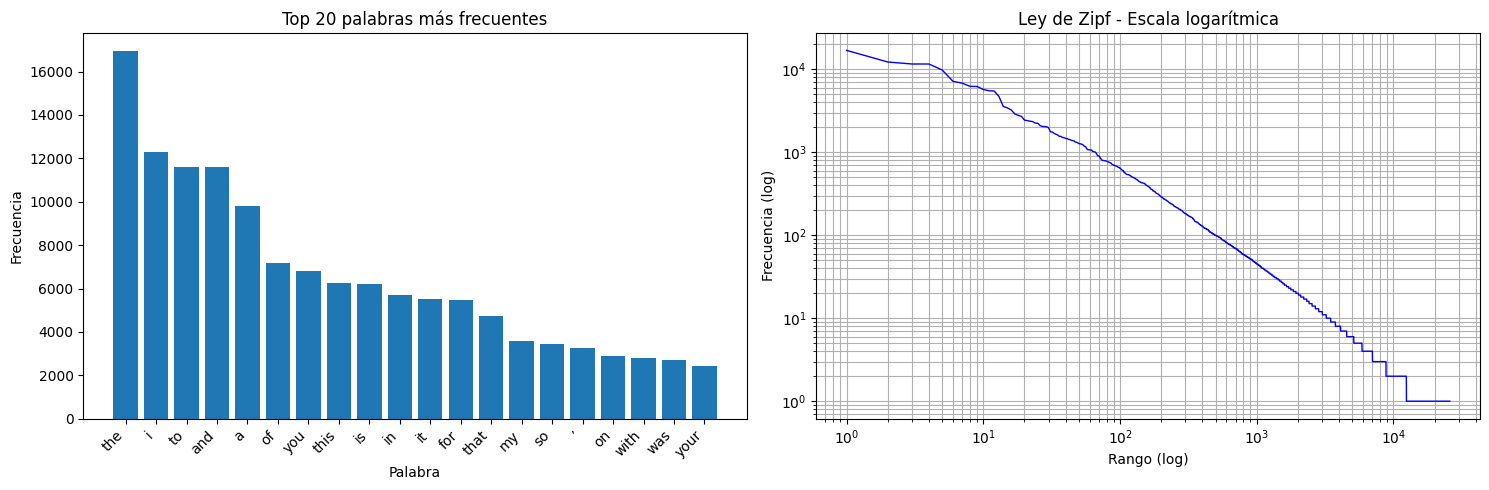

In [6]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt


# Contar frecuencias
word_counts = Counter(all_tokens)
most_common = word_counts.most_common()

# Separar palabras y frecuencias
words = [item[0] for item in most_common]
frequencies = [item[1] for item in most_common]
ranks = range(1, len(frequencies) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

top_n = 20
top_words = words[:top_n]
top_freqs = frequencies[:top_n]
ax1.bar(range(top_n), top_freqs)
ax1.set_title(f'Top {top_n} palabras más frecuentes')
ax1.set_xlabel('Palabra')
ax1.set_ylabel('Frecuencia')
ax1.set_xticks(range(top_n))
ax1.set_xticklabels(top_words, rotation=45, ha='right')

ax2.loglog(ranks, frequencies, 'b-', linewidth=1)
ax2.set_title('Ley de Zipf - Escala logarítmica')
ax2.set_xlabel('Rango (log)')
ax2.set_ylabel('Frecuencia (log)')
ax2.grid(True, which="both", ls="-")

plt.tight_layout()
plt.show()

# [Ley de Benford](https://en.wikipedia.org/wiki/Benford%27s_law)

También conocida como la "Ley del Primer Dígito", establece que en muchos conjuntos de datos numéricos de la vida real (como facturas, precios de acciones, población de ciudades o constantes físicas), el dígito 1 aparece como primer dígito significativo con mucha más frecuencia que el resto (aproximadamente el 30% de las veces), seguido por el 2, y así sucesivamente, hasta el 9, que aparece menos del 5% de las veces. Su utilidad principal radica en la detección de fraudes y anomalías, ya que los datos inventados por humanos suelen distribuir los dígitos de forma más uniforme.

In [8]:
!gdown 1QGm3jNdiK0opWk10cEDxqROueZZ_pS2Q

Downloading...
From: https://drive.google.com/uc?id=1QGm3jNdiK0opWk10cEDxqROueZZ_pS2Q
To: /content/Actividad precios.xlsx
100% 15.5k/15.5k [00:00<00:00, 39.6MB/s]


In [9]:
prices_df = pd.read_excel('Actividad precios.xlsx')
prices_df

,Unnamed: 0,Concepto 1,Concepto 2,Concepto 3,Concepto 4,Concepto 5,Concepto 6,Concepto 7,Concepto 8,Concepto 9,Concepto 10
0,ANGULO BERMUDEZ JOSE EMILIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANTUNEZ LOPEZ DENISSE GABRIELA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ARCE JAUREGUI GERARDO ANTONIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BORQUEZ GUERRERO ANGEL FERNANDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BRAMBILA AYALA LEONARDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CARO PEREZ HORACIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,CASTRO CORDOVA JOAQUIN ALFREDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CAZARES SUAREZ ANETTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,CHENOWETH GALAZ ANA LAURA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,CRUZ DUARTE MIGUEL ANGEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
import numpy as np

prices = prices_df.iloc[1:,1:].values
prices.shape

(26, 10)

In [15]:
prices = prices.reshape(-1,)

leading_digits = []

for x in prices:
    number = str(x)
    leading_digits.append(int(number[0]))

leading_digits = np.array(leading_digits)

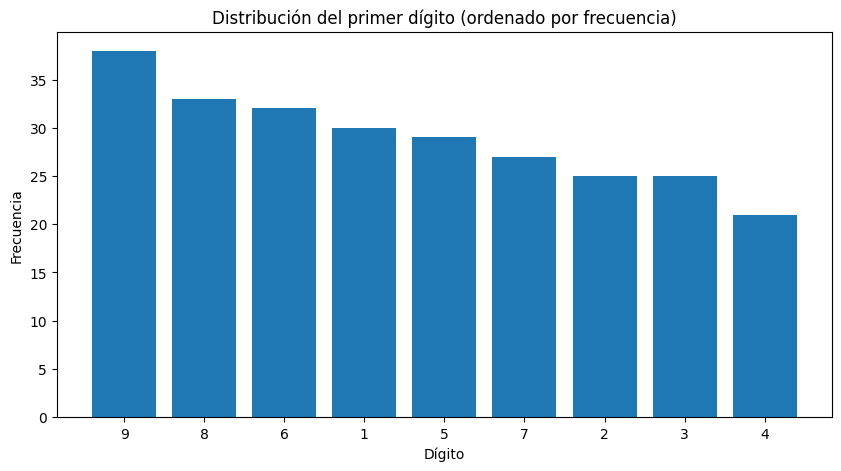

In [16]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Contar frecuencias
digit_counts = Counter(leading_digits)
sorted_countings = digit_counts.most_common()

# Extraer dígitos y conteos en el orden deseado
digits = [d for d, _ in sorted_countings]
counts = [count for _, count in sorted_countings]

# Crear el gráfico con posiciones numéricas
plt.figure(figsize=(10, 5))
x_positions = range(len(digits))
plt.bar(x_positions, counts)

# Etiquetas en el orden correcto
plt.xticks(x_positions, digits)
plt.xlabel('Dígito')
plt.ylabel('Frecuencia')
plt.title('Distribución del primer dígito (ordenado por frecuencia)')
plt.show()

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# Ley de Benford (porcentajes)
benford_law = np.array([30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6])

def extract_leading_digits(prices_row):
    """Extrae los primeros dígitos de una fila de precios"""
    leading = []
    for price in prices_row:
        if price > 0:
            leading.append(int(str(int(price))[0]))
    return np.array(leading)

def calculate_benford_distance(leading_digits):
    """Calcula qué tan cerca está de Benford usando chi-cuadrado"""
    if len(leading_digits) == 0:
        return np.inf

    # Contar frecuencias observadas
    counts = np.zeros(9)
    for d in leading_digits:
        if 1 <= d <= 9:
            counts[d-1] += 1

    # Convertir a porcentajes
    observed_pct = (counts / counts.sum()) * 100

    # Chi-cuadrado (menor valor = más cercano a Benford)
    chi2, p_value = chisquare(observed_pct + 0.01, benford_law)

    return chi2

def plot_student_vs_benford(leading_digits, student_name):
    """Grafica la distribución del estudiante vs Benford"""
    counts = np.zeros(9)
    for d in leading_digits:
        if 1 <= d <= 9:
            counts[d-1] += 1

    observed_pct = (counts / counts.sum()) * 100

    x = np.arange(1, 10)
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(x - width/2, observed_pct, width, label=student_name, alpha=0.8)
    ax.bar(x + width/2, benford_law, width, label='Ley de Benford', alpha=0.8)

    ax.set_xlabel('Primer Dígito')
    ax.set_ylabel('Porcentaje (%)')
    ax.set_title(f'Distribución de {student_name} vs Ley de Benford')
    ax.set_xticks(x)
    ax.legend()
    plt.show()

# ============= ANÁLISIS POR ESTUDIANTE =============

student_names = list(prices_df.iloc[1:,0].values)
n_students = len(student_names)
prices = prices_df.iloc[1:,1:].values

results = []

for i in range(n_students):
    row = prices[i, :]
    student_name = student_names[i]

    # Extraer primeros dígitos
    leading = extract_leading_digits(row)

    # Calcular distancia a Benford
    chi2_score = calculate_benford_distance(leading)

    results.append({
        'Estudiante': student_name,
        'Chi-cuadrado': chi2_score,
        'N_datos': len(leading)
    })


# Ordenar por chi-cuadrado
results_sorted = sorted(results, key=lambda x: x['Chi-cuadrado'])

print("\n TOP 3 MÁS REALISTAS:")
for res in results_sorted[:3]:
    print(f"   {res['Estudiante']}: χ² = {res['Chi-cuadrado']:.2f}")

print("\n TOP 3 MÁS SOSPECHOSOS:")
for res in results_sorted[-3:]:
    print(f"   {res['Estudiante']}: χ² = {res['Chi-cuadrado']:.2f}")


 TOP 3 MÁS REALISTAS:
   ANTUNEZ LOPEZ DENISSE GABRIELA: χ² = inf
   ARCE JAUREGUI GERARDO ANTONIO: χ² = inf
   BORQUEZ GUERRERO ANGEL FERNANDO: χ² = inf

 TOP 3 MÁS SOSPECHOSOS:
   SANCHEZ BERMUDEZ BRAULIO ALESSANDRO: χ² = inf
   TORRES FLORES ALAN DAVID: χ² = inf
   VEGA LEYVA JOSE FRANCISCO: χ² = inf


In [24]:
n_students

260